# Classification (Decision boundary, Logistic regression, Kernel trick, SVM)
#### Author: RAZAFINDRAKOTO Tsiba Nathanaëla

In [4]:
!pip install mglearn

### Data and libraries 

In [7]:
import sys
sys.path.append("..") 
  
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split

### Understanding decision boundaries

#### Case 1: Two classes problem

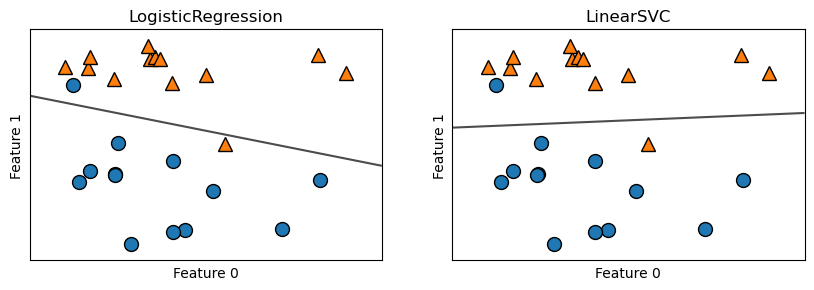

In [9]:
# Import the dataset
X, y = mglearn.datasets.make_forge()

# Plot decision boundaries for two methods: (i) logistic regressions and (ii) support vector classifier
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LogisticRegression(), LinearSVC(dual=False, max_iter=5000)], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

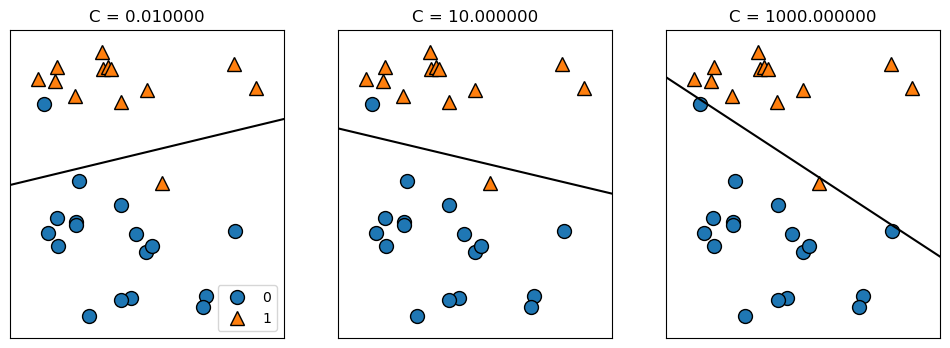

In [7]:
# The decision boundary changes according to different values of the cost parameter
# e.g. a small C correspends to a lot of regularization
mglearn.plots.plot_linear_svc_regularization()

#### Case 2: Multiclass program 

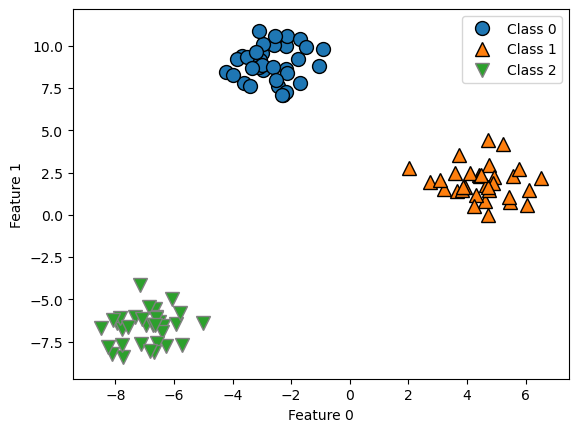

In [11]:
# Import the dataset
from sklearn.datasets import make_blobs

# Plot the data 
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

# Fit the model
linear_svm = LinearSVC(dual=False).fit(X, y)


# Some notes:
# One vs. Rest approach: a binary model is learned for each class that separates that class from all the other classes
# To make predictions (and also draw decision boundaries), all binary classifiers are run on a test observation 
# and the classifier with the highest score on its single class determines the final class label

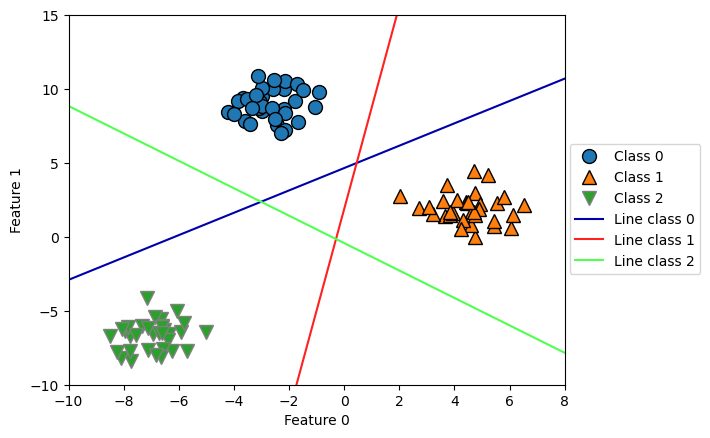

In [18]:
# Plot the different decision boundaries
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

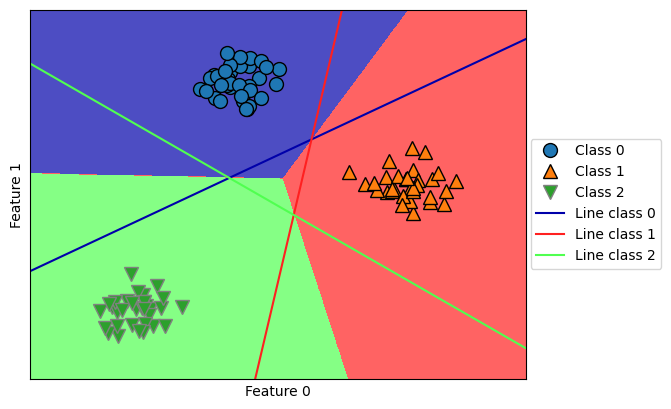

In [13]:
# Color the regions
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


#### What happens if you change the random_state when generating the data?

When we change the random_state while generating the data, the arrangement of the data points in the graph changes. The points will be distributed differently in space, even though they will still have the same statistical properties (for example, the number of classes or points remains the same). As a result, the decision boundaries of classification models, like logistic regression or SVM, will also adjust to match the new arrangement of the data. This can lead to changes in the lines that separate the classes, but the logic of the model stays the same. In summary, changing the random_state affects how the data is arranged and changes how the model learns to separate the classes in the feature space.

## Logistic regression

In [15]:
### The objective is to develop a classifier to predict the type of a breast cancer (Malignant=1; Benign=0)
### based on a set of features obtained through digitized fine-needle aspirate (FNA) images of a breast mass 

# Import breast cancer data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# # Create training and test set
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# Fit the model on the training set 
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

### Why is it preferable to set a maximum number of iterations? 

Setting a maximum number of iterations ensures the logistic regression algorithm doesn't run indefinitely while trying to find the best solution. It helps the model stop if it takes too long to converge, especially with large or complex datasets. This prevents excessive computation time and ensures the process is efficient.

In [17]:
# Check the performance of the model
print("Accuracy (training): {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy (test): {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy (training): 0.967
Accuracy (test): 0.937


### How do you interpret the accuracy of the model? 

The model performs well overall, with a high accuracy on both training and test sets. The small drop in test accuracy (from 96.7% to 93%) suggests that the model generalizes well, meaning it is not overfitting the training data. The model is able to maintain strong performance on new, unseen data.

In [23]:
# Regularization: change the value of C to change the flexibility of the model
logreg001 = LogisticRegression(max_iter=10000, C=0.001).fit(X_train, y_train)
logreg50 = LogisticRegression(max_iter=10000, C=50).fit(X_train, y_train)

# Check the performance of the models
print("Accuracy C=0.001 (test): {:.3f}".format(logreg001.score(X_test, y_test)))
print("Accuracy C=50 (test): {:.3f}".format(logreg50.score(X_test, y_test)))



Accuracy C=0.001 (test): 0.930
Accuracy C=50 (test): 0.951


### How can you find the optimal value of C? Propose a solution

To find the optimal value of C, we can use cross-validation by trying different values of C and checking the model's performance for each. Cross-validation helps ensure that the chosen value of C performs well not just on the training data, but also on unseen data, making the model more reliable and less prone to overfitting.

## SVM - Understanding Kernel trick

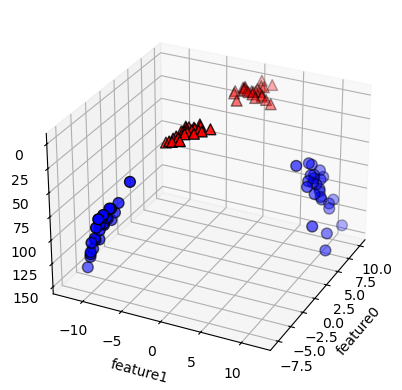

In [31]:
# In[ ]: ******************************************************************************
# ****************************** SVM - Understanding Kernel trick *********************
# *************************************************************************************
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import mglearn

# Générer les données
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

# Ajouter un terme quadratique
X_new = np.hstack([X, X[:, 1:] ** 2])

# Créer la figure et l'axe 3D
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d', elev=-152, azim=-26)

# Tracer les points pour les deux classes
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')

# Étiqueter les axes
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")
plt.show()





### Can observations be linearly separated in this new input space?

In the new 3D input space, the observations can be linearly separated. The addition of the quadratic term (feature1 squared) allows the data points, which were not separable in the original 2D space, to become separable by a plane in 3D space. This transformation spreads out the data along the z-axis (feature1 squared), making it easier for a linear classifier (like the SVM) to draw a separating plane between the two classes. The key is that while the data may not be separable with a straight line in the original 2D space, they become separable by a plane in the 3D space. Therefore, the kernel trick in SVM effectively turns a non-linear problem into a linear one in a higher-dimensional space.








In [34]:
# Fit the model on the new features
linear_svm_3d = LinearSVC(dual=False, max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Separate the two classes in the new input space
figure = plt.figure()
ax = Axes3D(figure, elev=-155, azim=-20)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.6)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Feature 1')

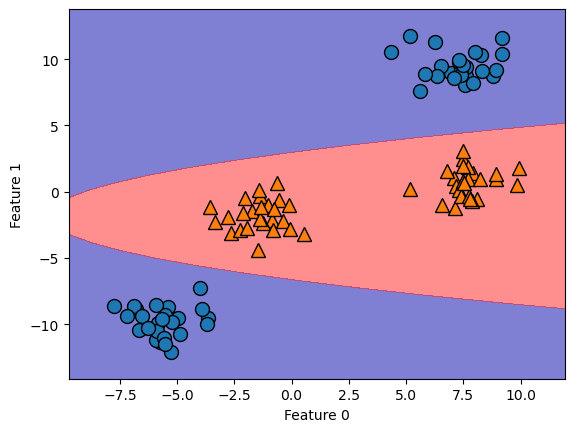

In [36]:
# Notice that in the original input space, the decision boundary is not linear anymore
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## SVM - Playing with hyper-parameters

In [41]:
# ****************************** SVM - Playing with hyper-parameters *********************
# ****************************************************************************************

# Import the data
X, y = mglearn.tools.make_handcrafted_dataset()    

# Fit the model with Gaussian kernel
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

# We can see which are the support vectors
sv = svm.support_vectors_

# Class labels of support vectors are given by the sign of the dual coefficients
svm.dual_coef_


array([[-10.        ,  -6.25178295,  -3.73381586,  10.        ,
          9.98559881]])

### How many support vectors do you have here?

The number of support vectors can be determined by looking at the length of svm.support_vectors. In this case, since the array svm.dual_coef_ contains 5 values, it means there are 5 support vectors. These support vectors are the data points that influence the decision boundary of the SVM model. The more support vectors you have, the more data points are critical in defining the decision boundary.

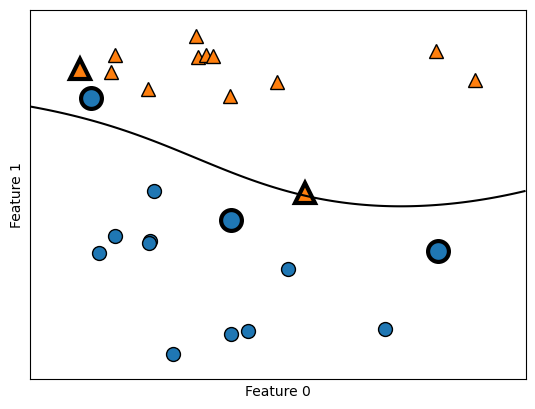

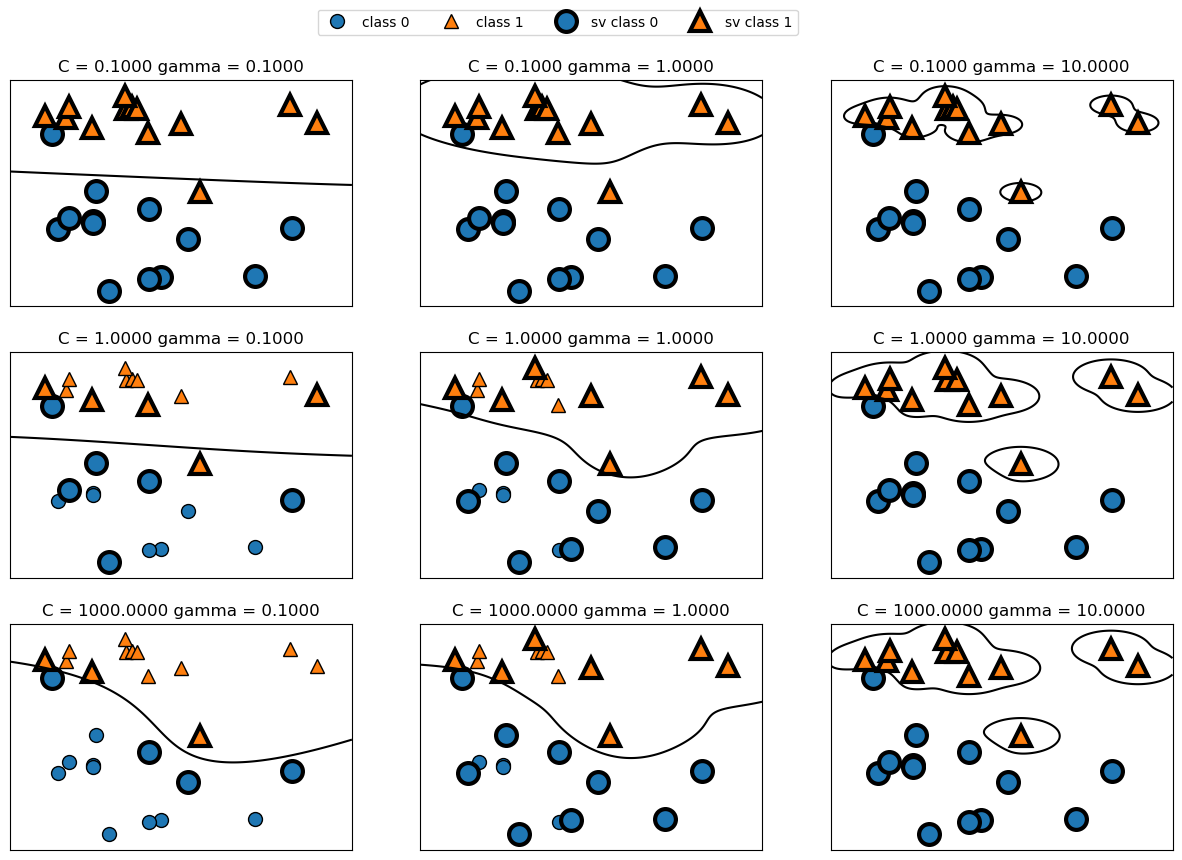

In [44]:
# Plot the decision boundary and support vectors
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Gamma controls the width of the kernel, while C is the usual cost parameter
# Both can be changed to play with the flexibility of the model [this takes some time to run]
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))


### Which model is likely to overfit the data? Which model has the highest bias?

The model with high values of C = 1000 and gamma = 10 is likely to overfit the data. This model has a highly complex decision boundary that tries to closely fit all the training points, including noise. While it performs very well on the training data, it may not generalize well to new, unseen data because it captures the noise and specific details of the training set rather than the overall pattern.

The model with low values of C = 0.1 and gamma = 0.1 has the highest bias. The decision boundary here is very simple and smooth, which means the model is not capturing enough complexity in the data. This can lead to underfitting, where the model does not perform well on both the training and test sets because it fails to learn the true structure of the data.

# SVM - Summing up

In [49]:
# ****************************** SVM - Summing up *********************
# *********************************************************************

# Import the data
cancer = load_breast_cancer()

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Instantiate the model
# By default, C=1 and gamma=1/nb.features
svm = SVC()

# Fit the model on the training set 
svm.fit(X_train, y_train)

print("Accuracy (training): {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy (test): {:.3f}".format(svm.score(X_test, y_test)))

Accuracy (training): 0.904
Accuracy (test): 0.937


Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


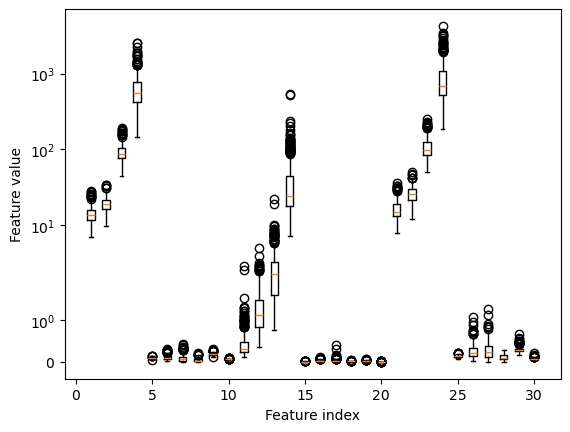

In [51]:
# IMPORTANT: SVM are sensitive to the scaling of the data
# Here data are on completely different orders of magnitude
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature value")

# One way to solve the problem is by rescaling each feature (there are different ways to do so)
# See also the functions:
#   - MinMaxScaler() - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#   - StandardScaler() - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# We compute the minimum value for each feature on the training set
min_on_training = X_train.min(axis=0)
# And the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# Then we subtract the min and divide by range
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Accuracy (training): 0.984
Accuracy (test): 0.972


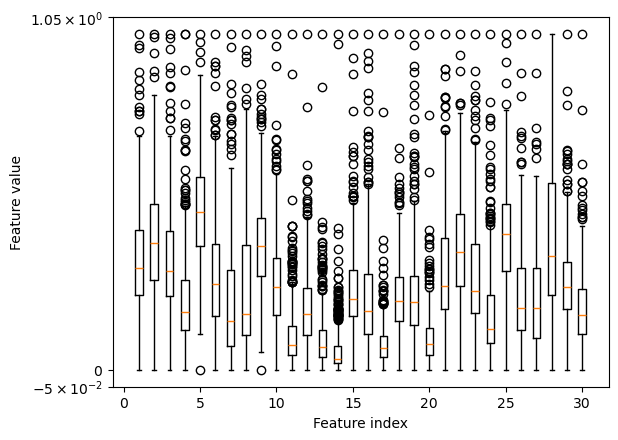

In [53]:
# Now we obtain the same scale
plt.boxplot(X_train_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature value")

# Make sure to use the same scaling on the test set, using min and range of the training set
X_test_scaled = (X_test - min_on_training) / range_on_training

# Finally, check the performance of the model
svm = SVC()
svm.fit(X_train_scaled, y_train)

print("Accuracy (training): {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Accuracy (test): {:.3f}".format(svm.score(X_test_scaled, y_test)))

###  - What happens to the performance of the model if you use the StandardScaler()?

Using the StandardScaler() improves the performance of Support Vector Machine (SVM) models, as it standardizes the data by removing the mean and scaling to unit variance. Without scaling, some features can dominate others due to their larger magnitude. With standardized features, the SVM can work more effectively by treating all features equally. This generally improves both training and test accuracy. After scaling, we often see better results compared to unscaled data because the SVM model is sensitive to the scale of the features.

### - How can you find the optimal value of C and gamma? Propose a solution

To find the optimal values of C and gamma, we can use cross-validation in combination with a grid search. This technique systematically evaluates different combinations of C (which controls the regularization) and gamma (which controls the influence of each training example) over a range of values. By using grid search combined with cross-validation (e.g., GridSearchCV from scikit-learn), the model will automatically test all combinations and return the parameters that result in the best performance on a validation set. The key advantage of cross-validation is that it helps avoid overfitting by ensuring that the model generalizes well to unseen data.

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

print("Best parameters found:", grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

### - Propose at least another Kernel function and test the performance of the model 

Apart from the Gaussian Radial Basis Function (RBF) kernel, which is the default in SVM, another popular kernel function is the Polynomial kernel. We 
can apply the polynomial kernel to model more complex decision boundaries.

In [64]:
# Polynomial Kernel SVM
svm_poly = SVC(kernel='poly', degree=3)  # We can adjust the degree parameter as needed
svm_poly.fit(X_train_scaled, y_train)

# Evaluate the performance
print("Accuracy (training) with Polynomial Kernel: {:.3f}".format(svm_poly.score(X_train_scaled, y_train)))
print("Accuracy (test) with Polynomial Kernel: {:.3f}".format(svm_poly.score(X_test_scaled, y_test)))

Accuracy (training) with Polynomial Kernel: 0.988
Accuracy (test) with Polynomial Kernel: 0.958
